In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [19]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

device = torch.device('cpu')
print('Running on CPU')

Running on GPU
NVIDIA GeForce GTX 1050 Ti with Max-Q Design
Running on CPU


In [3]:
raw = pd.read_csv('A_Z Handwritten Data.csv')

In [ ]:
#raw.head(1)

In [4]:
np_unshuffled = raw.to_numpy()

In [5]:
#shuffle data
np.random.shuffle(np_unshuffled)

In [6]:
#print(np_unshuffled[:50,:])
np_shuffled = np_unshuffled
#print(np_shuffled[:50,:])

In [7]:
dataset = torch.tensor(np_shuffled)

In [30]:
#dataset.size()

torch.Size([372450, 785])

In [8]:
#split into train / test datasets. First column is expected value
split = int(0.7*372450)
#print(split)

train_dataset = dataset[:split,:]

#print(train_dataset)
#print(train_dataset.size())

test_dataset = dataset[split:,:]
#print(test_dataset.size())


In [9]:
train_x = train_dataset[:,1:]
train_y = train_dataset[:,0]

test_x = test_dataset[:,1:]
test_y = test_dataset[:,0]

In [ ]:
#Visualize data
#Inputs = train_x[0]
#Inputs = torch.reshape(Inputs, (28,28))
#print(Inputs)
#plt.imshow(training_x[0][0], cmap='gray')
#train_y[0]

In [10]:
#reshape
training_x = torch.reshape(train_x, (260714,1,28,28))
#print(training_x[:16].size())

testing_x = torch.reshape(test_x, (111736,1, 28,28))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          56, 140, 159, 102,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 157,
         248, 255, 255, 241, 156,  25,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [54]:
#change to float tensor
training_x_flt = training_x.float()
testing_x_flt = testing_x.float()

In [ ]:
#DataLoader (No Need)
#train_loader = torch.utils.data.DataLoader(training_set, batch_size=2000, shuffle=True) 
#test_loader = torch.utils.data.DataLoader(testing_x, batch_size=2000, shuffle=True)

In [ ]:
#testing reshape
#square = torch.reshape(train_x, (260714,28,28))
#square[0]

In [49]:
#Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, stride=1, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=3)
        self.conv2 = nn.Conv2d(16, 32, 5, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        #self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flat = nn.Flatten()
        
        self.ll1 = nn.Linear(288, 150)
        self.ll2 = nn.Linear(150, 84)
        self.ll3 = nn.Linear(84, 42)
        self.ll4 = nn.Linear(42,26)
    
    def forward(self, x):
        x = self.maxpool1(F.relu(self.conv1(x)))
        x = self.maxpool2(F.relu(self.conv2(x)))
        #x = self.maxpool3(F.relu(self.conv3(x)))
        x = self.flat(x)
        
        x = F.relu(self.ll1(x))
        x = F.relu(self.ll2(x))
        x = F.relu(self.ll3(x))
        x = self.ll4(x)
        return x
        

In [50]:
#Initialize Model
identifyLetter = CNN()
identifyLetter.to(device)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (ll1): Linear(in_features=288, out_features=150, bias=True)
  (ll2): Linear(in_features=150, out_features=84, bias=True)
  (ll3): Linear(in_features=84, out_features=42, bias=True)
  (ll4): Linear(in_features=42, out_features=26, bias=True)
)

In [51]:
#Loss Function
loss_func = nn.CrossEntropyLoss()

In [52]:
#Optimizer
optimizer = torch.optim.Adam(identifyLetter.parameters())

In [ ]:
#train_x_flt = train_x.float()
#test_x_flt = test_x.float()

In [55]:
#Train Function
def train(model, batch_size, loss_f, optimizer, device):
    losses = []
    model.train()
    
    total_batches = int(len(training_x)/batch_size)
    
    for batch_n in range (total_batches):
        optimizer.zero_grad()
        inputs = training_x_flt[batch_n*batch_size:(batch_n+1)*batch_size]
        labels = train_y[batch_n*batch_size:(batch_n+1)*batch_size]
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = loss_f(outputs, labels)
        loss.backward()
        losses.append(loss)
        optimizer.step()
        
    print('End of epoch loss:', round((sum(losses)/len(train_dataset)).item(), 3))

In [56]:
#Test Function
def test(model, batch_size, device):
    model.eval()
    correct = 0
    total_batches = int(len(testing_x)/batch_size)
    
    for batch_n in range(total_batches):
        inputs = testing_x_flt[batch_n*batch_size:(batch_n+1)*batch_size]
        labels = test_y[batch_n*batch_size:(batch_n+1)*batch_size]
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        prediction = model(inputs).argmax(axis=1)
        correct += (prediction == labels).sum().item()
        #print('pred: ', prediction)
        #print('actual: ', labels)
        
    print('End of epoch accuracy:', 100*correct/len(test_dataset), '%')

In [57]:
#Train/Test Script
for epoch in range(1,51):
    print('Epoch: ', epoch)
    train(identifyLetter, 20000, loss_func, optimizer, device)
    test(identifyLetter, 20000, device)

Epoch:  1
End of epoch loss: 0.0
End of epoch accuracy: 37.568017469750124 %
Epoch:  2
End of epoch loss: 0.0
End of epoch accuracy: 58.40105248084771 %
Epoch:  3
End of epoch loss: 0.0
End of epoch accuracy: 73.24049545356912 %
Epoch:  4
End of epoch loss: 0.0
End of epoch accuracy: 79.35311806400802 %
Epoch:  5
End of epoch loss: 0.0
End of epoch accuracy: 82.35394143337868 %
Epoch:  6
End of epoch loss: 0.0
End of epoch accuracy: 83.85569556812487 %
Epoch:  7
End of epoch loss: 0.0
End of epoch accuracy: 84.75513710889955 %
Epoch:  8
End of epoch loss: 0.0
End of epoch accuracy: 85.35923963628554 %
Epoch:  9
End of epoch loss: 0.0
End of epoch accuracy: 85.81656762368439 %
Epoch:  10
End of epoch loss: 0.0
End of epoch accuracy: 86.14054557170473 %
Epoch:  11
End of epoch loss: 0.0
End of epoch accuracy: 86.36786711534332 %
Epoch:  12
End of epoch loss: 0.0
End of epoch accuracy: 86.53701582301139 %
Epoch:  13
End of epoch loss: 0.0
End of epoch accuracy: 86.79387126798883 %
Epoch: 

In [78]:
import random

372450

prediction: Q
label Q


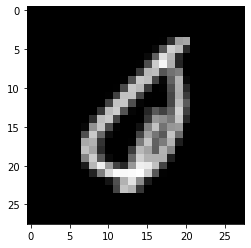

In [106]:
#Test one

num = random.randint(0, len(dataset)) #make random number
total_dataset = torch.reshape(dataset[:,1:],(len(dataset),1,28,28))
test_input = total_dataset[num].float()
label = dataset[num,0]
test_input = torch.reshape(test_input, (1,1,28,28))

plt.imshow(test_input[0][0], cmap='gray')
prediction = identifyLetter(test_input).argmax(axis=1)
print('prediction:', chr(prediction+65))
print('label', chr(label+65))
#train_y[0]

# Extras

In [58]:
# save weights
torch.save(identifyLetter.state_dict(), "./LetterIdentifyModel.pt") 

In [ ]:
#loader
updatedIdentifier = CNN()
modelWeights = torch.load("./LetterIdentifyModel.pt")
updatedIdentifier.load_state_dict(modelWeights)

In [ ]:
#continue Testing
n_epoch = 50
batch_s = 20000
for epoch in range(1, n_epoch+1):
    print('Epoch: ', epoch)
    train(updatedIdentifier, batch_s, loss_func, optimizer, device)
    test(updatedIdentifier, batch_s, device)

In [47]:
#test size
m = nn.Sequential(
    nn.Conv2d(1,16,5,stride=1,padding=2),
    nn.MaxPool2d(kernel_size=3, stride=3),
    nn.Conv2d(16,32,5,stride=1,padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    #nn.Conv2d(32,64,3,stride=1,padding=1),
    #nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten()
)

In [48]:
input = torch.randn(2000,1,28,28)
output = m(input)
output.size()

torch.Size([2000, 288])